In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

In [3]:
housing=fetch_california_housing()
print(housing)
print(housing.DESCR)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [5]:
df=pd.DataFrame(housing.data,columns=housing.feature_names)
df['price']=housing.target

In [7]:
print(df.describe())
print('*'*100)
print(df.isnull().sum())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [9]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [11]:
corrr=df.corr()
corrr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


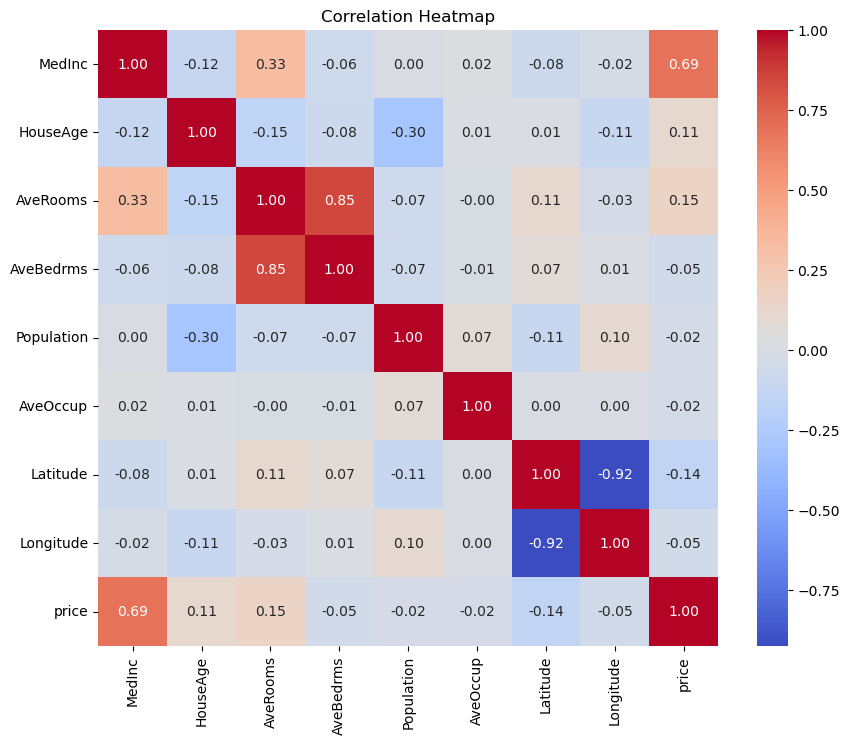

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(corrr,annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [25]:
df = df.drop('AveRooms', axis=1)
corrr=df.corr()
corrr


,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveBedrms,-0.062040,-0.077747,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

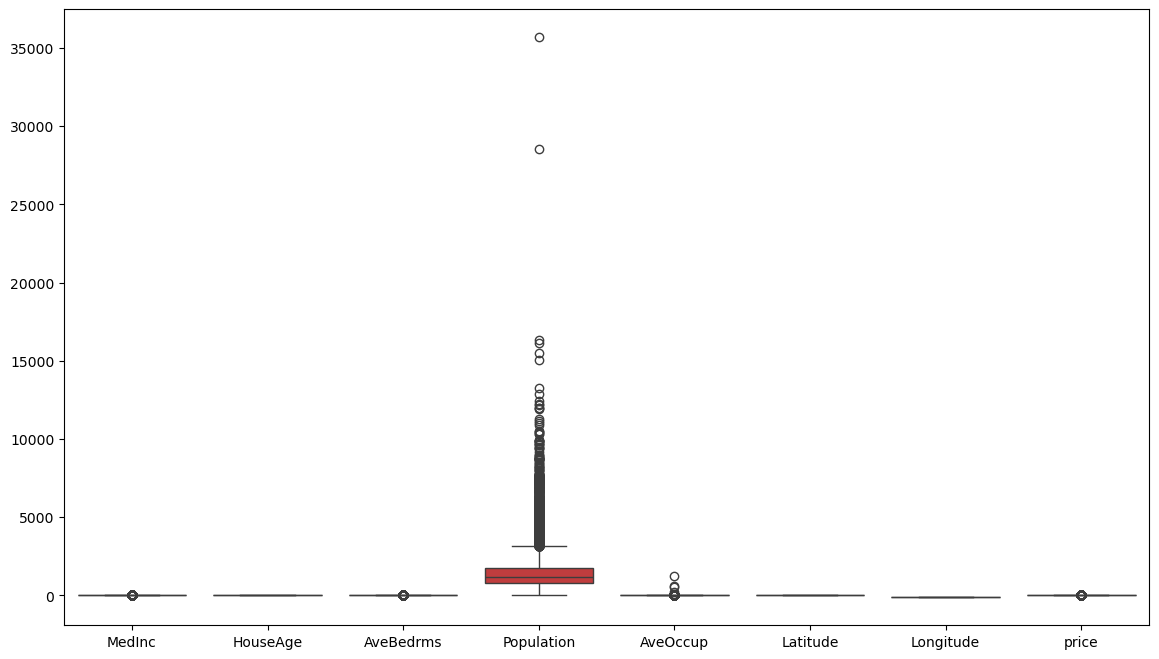

In [33]:
fig,ax=plt.subplots(figsize=(14,8))
sns.boxplot(df,ax=ax)

In [35]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [37]:
print(x)
print('#'*100)
y

       MedInc  HouseAge  AveBedrms  Population  AveOccup  Latitude  Longitude
0      8.3252      41.0   1.023810       322.0  2.555556     37.88    -122.23
1      8.3014      21.0   0.971880      2401.0  2.109842     37.86    -122.22
2      7.2574      52.0   1.073446       496.0  2.802260     37.85    -122.24
3      5.6431      52.0   1.073059       558.0  2.547945     37.85    -122.25
4      3.8462      52.0   1.081081       565.0  2.181467     37.85    -122.25
...       ...       ...        ...         ...       ...       ...        ...
20635  1.5603      25.0   1.133333       845.0  2.560606     39.48    -121.09
20636  2.5568      18.0   1.315789       356.0  3.122807     39.49    -121.21
20637  1.7000      17.0   1.120092      1007.0  2.325635     39.43    -121.22
20638  1.8672      18.0   1.171920       741.0  2.123209     39.43    -121.32
20639  2.3886      16.0   1.162264      1387.0  2.616981     39.37    -121.24

[20640 rows x 7 columns]
######################################

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: price, Length: 20640, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train)
print('#'*100)
y_train

       MedInc  HouseAge  AveBedrms  Population  AveOccup  Latitude  Longitude
7061   4.1312      35.0   0.975490      1218.0  2.985294     33.93    -118.02
14689  2.8631      20.0   1.076613       999.0  2.014113     32.79    -117.09
17323  4.2026      24.0   0.989474       731.0  2.564912     34.59    -120.14
10056  3.1094      14.0   1.094203       302.0  2.188406     39.26    -121.00
15750  3.3068      52.0   1.066265      1526.0  2.298193     37.77    -122.45
...       ...       ...        ...         ...       ...       ...        ...
11284  6.3700      35.0   0.926267       658.0  3.032258     33.78    -117.96
11964  3.0500      33.0   1.269488      1753.0  3.904232     34.02    -117.43
5390   2.9344      36.0   1.079696      1756.0  3.332068     34.03    -118.38
860    5.7192      15.0   1.067979      1777.0  3.178891     37.58    -121.96
15795  2.5755      52.0   1.058776      2619.0  2.108696     37.77    -122.42

[14448 rows x 7 columns]
######################################

7061     1.93800
14689    1.69700
17323    2.59800
10056    1.36100
15750    5.00001
          ...   
11284    2.29200
11964    0.97800
5390     2.22100
860      2.83500
15795    3.25000
Name: price, Length: 14448, dtype: float64

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_norm=scaler.fit_transform(x_train)
x_test_norm=scaler.transform(x_test)

/var/folders/f2/01t6cgs523d0hygfn8krf_fw0000gn/T/ipykernel_979/954436845.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(feature_names, fontsize=12)


[Text(0, 0, 'MedInc'),
 Text(1, 0, 'HouseAge'),
 Text(2, 0, 'AveBedrms'),
 Text(3, 0, 'Population'),
 Text(4, 0, 'AveOccup'),
 Text(5, 0, 'Latitude'),
 Text(6, 0, 'Longitude')]

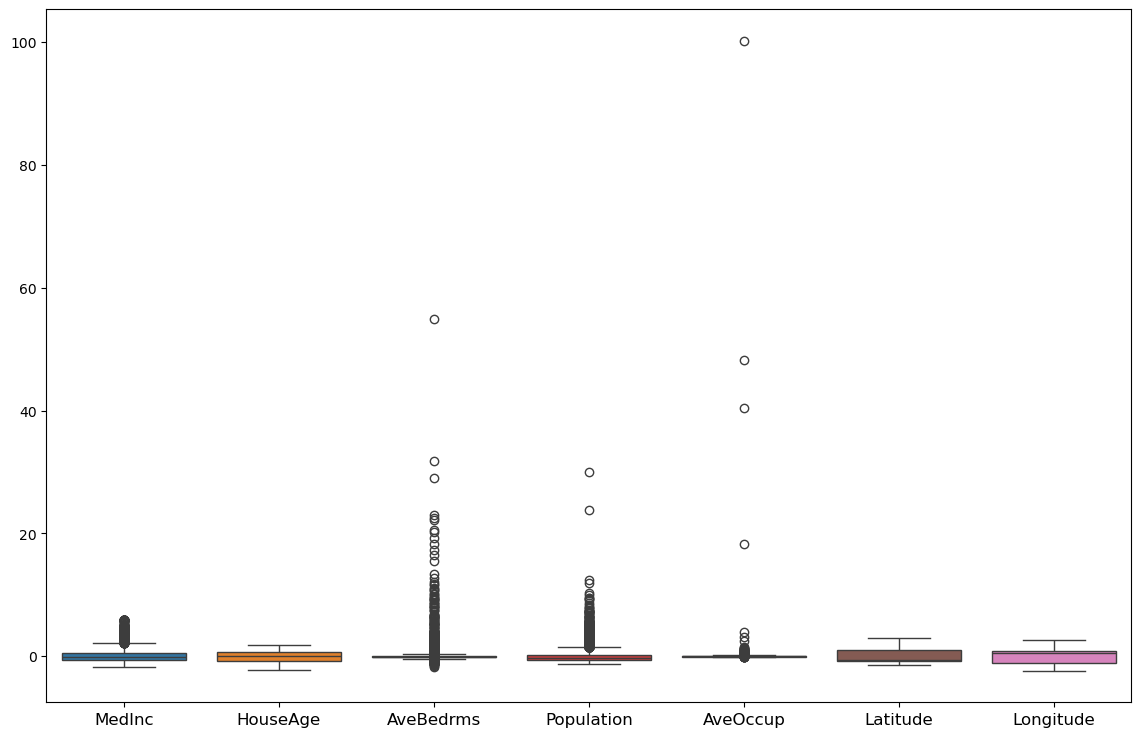

In [49]:
feature_names = ["MedInc", "HouseAge", "AveBedrms",
                 "Population", "AveOccup", "Latitude", "Longitude"]
fig,ax=plt.subplots(figsize=(14,9))
sns.boxplot(data=x_train_norm,ax=ax)

ax.set_xticklabels(feature_names, fontsize=12)


In [51]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_norm,y_train)



LinearRegression()

In [53]:
print(model.coef_)
print('#'*100)
print(model.intercept_)

[ 0.72615909  0.12622608  0.09521095  0.00237605 -0.03852054 -0.98823855
 -0.94505513]
####################################################################################################
2.0692396089424165


In [59]:
pred=model.predict(x_test_norm)
from sklearn.metrics import mean_squared_error,r2_score
print("RMS IS :",(mean_squared_error(y_test,pred)))
print('R SCORE IS: ',r2_score(y_test,pred))


RMS IS : 0.5305540749343544
R SCORE IS:  0.595780676128798


In [67]:
from sklearn.linear_model import Lasso,Ridge
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(x_train_norm,y_train)
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(x_train_norm,y_train)

Ridge()

In [73]:
lassoPred=lasso_model.predict(x_test_norm)
print("RMS IS :",np.sqrt(mean_squared_error(y_test,lasooPred)))
print('R SCORE IS: ',r2_score(y_test,lassoPred))

RMS IS : 1.1456636798696462
R SCORE IS:  -3.930972139576383e-06


In [75]:
ridgePred=ridge_model.predict(x_test_norm)
print("RMS IS :",np.sqrt(mean_squared_error(y_test,ridgePred)))
print('R SCORE IS: ',r2_score(y_test,ridgePred))

RMS IS : 0.7283886665207951
R SCORE IS:  0.5957837430205359


In [81]:
import pickle
pickle.dump(ridge_model,open('final_model','wb'))